# This is the part (3) of our project.
Classification model-Random Forest Classifier
---



In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import datetime
from datetime import datetime

In [54]:
train1 = pd.read_csv("/content/drive/MyDrive/CSV/feature_vector.csv")
# print(type(train))

In [55]:
max4=-1
for lines in train1.Date:
  line=datetime.timestamp(datetime.strptime(lines, '%Y-%m-%d %H:%M:%S'))
  max4=max4 if max4>float(line) else float(line)
print(max4)

arr=[]
for x,y,z,a,b,c,d,e in zip(train1.PostID,train1.Title,train1.Date,train1.NumberOfComments,train1.SentimentScore,train1.PageRank,train1.DegreeCentrality,train1.Score):
  #Conversion of date to timestamp UTC
  date1=datetime.timestamp(datetime.strptime(z, '%Y-%m-%d %H:%M:%S'))/max4
  temp=[x,y,date1,a,b,c,d,e]
  arr.append(temp)

1580408970.0


In [56]:
train=pd.DataFrame(arr,columns=["PostID","Title","Date","NumberOfComments","SentimentScore","PageRank","DegreeCentrality","Score"])

In [57]:
train.head()
# print(train.to_string())

,PostID,Title,Date,NumberOfComments,SentimentScore,PageRank,DegreeCentrality,Score
0,ei7nwx,How i celebrate New years,0.998362,0,1,0.000001,0.000000,1
1,ei7o1k,The Elder Scrolls Online,0.998362,4,0,0.000006,0.000028,1
2,ei7oio,"THIS SHOULD BE POSTED IN MOBILE GAMING, BUT TH...",0.998362,0,0,0.000001,0.014922,0
3,ei7rxa,"They say, ""The wat you spend New Year\'s Eve i...",0.998363,2,1,0.000001,0.014922,6
4,ei7vkp,This game is ruining me (AI Dungeon 2),0.998363,0,-1,0.000001,0.014922,1


In [58]:
def partition(x):
    if x < 5:
        return 0
    return 1

#changing Score with value less than 5 to be 0 and greater than 5 to be 1
actualScore = train['NumberOfComments']
positiveNegative = actualScore.map(partition) 
train['NumberOfComments'] = positiveNegative
# print("Number of data points in our data", train.shape)
# print(train.to_string())

In [59]:
labels = train.pop("NumberOfComments")
train.pop("PostID")
train.pop("Title")
# print(labels.to_string())

0                                How i celebrate New years
1                                 The Elder Scrolls Online
2        THIS SHOULD BE POSTED IN MOBILE GAMING, BUT TH...
3        They say, "The wat you spend New Year\'s Eve i...
4                   This game is ruining me (AI Dungeon 2)
                               ...                        
31226                    FiVeM Lua EXECUTOR (2020) PL[ENG]
31227      Best recent Magic the Gathering set for sealed?
31228                         Who knows what game this is?
31229    [KH3 Re:Mind] Xehanort makes the secret boss k...
31230    Easter Eggs in Reality - Have you guys seen this?
Name: Title, Length: 31231, dtype: object

In [60]:
print(type(labels))
print(labels.median())
print(labels.mean())

<class 'pandas.core.series.Series'>
0.0
0.31010854599596555


In [61]:

x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.20)
# print(x_test)

In [62]:

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
y_pred = rf.predict(x_test)
filename = "y_pred.csv"
filea = "y_test.csv"
DF = pd.DataFrame(y_pred)
DF.to_csv(filename)
DFa = pd.DataFrame(y_test)
DFa.to_csv(filea)


In [64]:
test = []
for a,b in zip(y_pred,y_test):
  if a == b:
    test.append(1)
  else:
    test.append(0)
print(test)
ones = test.count(1)
zeroq = test.count(0)
percen = ones/(ones+zeroq)
print(percen*100)

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 

In [65]:
print(accuracy_score(y_train, rf.predict(x_train)))
print(accuracy_score(y_test, y_pred))

0.9971181556195965
0.8791419881543141


# Confusion  Matrix

In [66]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,3781,497,4278
1,258,1711,1969
All,4039,2208,6247


#Classification Report Precision,Recall F1-Score

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      4278
           1       0.77      0.87      0.82      1969

    accuracy                           0.88      6247
   macro avg       0.86      0.88      0.86      6247
weighted avg       0.89      0.88      0.88      6247



# Plotting Precision and Recall

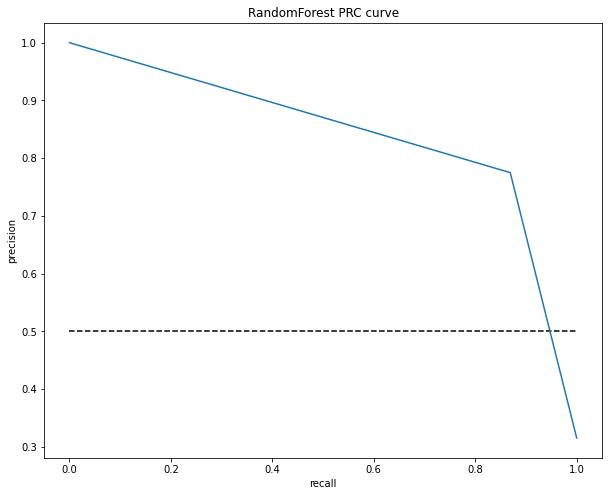

In [68]:

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'RandomForest')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('RandomForest PRC curve')
plt.show()



#Accuracy

In [ ]:
auc_prc = auc(recall, precision)
print(auc_prc)